# Modelling Extreme values

This notebook is a brief example of the possibilities offered by the toolbox for modelling extreme value. 
It relies on the `pyextreme` library which get installed with the Resourcecode toolbox. It allows for both univariate and multivariate modelling.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from pyextremes import (
    plot_mean_residual_life,
    plot_parameter_stability
)
import resourcecode

from resourcecode.eva import (
    censgaussfit,
    get_fitted_models,
    get_gpd_parameters,
    run_simulation,
    huseby,
)
import warnings
warnings.filterwarnings("ignore")

We first load some data at location `124282` (coordinates: $(-3.2519, 47.4439)$) which is next to Bele-Ile island (Brittany)

In [2]:
client = resourcecode.Client()
data = client.get_dataframe_from_criteria(
    """
{
    "node": 124282,
    "start": 0,
    "end": 99999903600,
    "parameter": ["hs","uwnd","vwnd"]
}
"""
)

In [3]:
data.head()

hs  uwnd  vwnd
1998-01-01 00:00:00  3.310   5.6  -1.5
1998-01-01 01:00:00  3.348   4.9  -1.0
1998-01-01 02:00:00  3.430   5.1  -0.5
1998-01-01 03:00:00  3.512   4.8   0.5
1998-01-01 04:00:00  3.586   5.4   1.3

In [4]:
data["wspd"], data["wdir"] = resourcecode.utils.zmcomp2metconv(data.uwnd, data.vwnd)

In [5]:
data.head()

hs  uwnd  vwnd      wspd        wdir
1998-01-01 00:00:00  3.310   5.6  -1.5  5.797413  284.995079
1998-01-01 01:00:00  3.348   4.9  -1.0  5.001000  281.534621
1998-01-01 02:00:00  3.430   5.1  -0.5  5.124451  275.599339
1998-01-01 03:00:00  3.512   4.8   0.5  4.825971  264.053137
1998-01-01 04:00:00  3.586   5.4   1.3  5.554278  256.464144

### Modelling univariate time series

We show as example here a **POT** model fitted to the $H_s$ time series. Same plot can readily be obtained for the other sea-state parameters.

We first can have a look at the quality of the fitted model, and to the corresponding return levels.

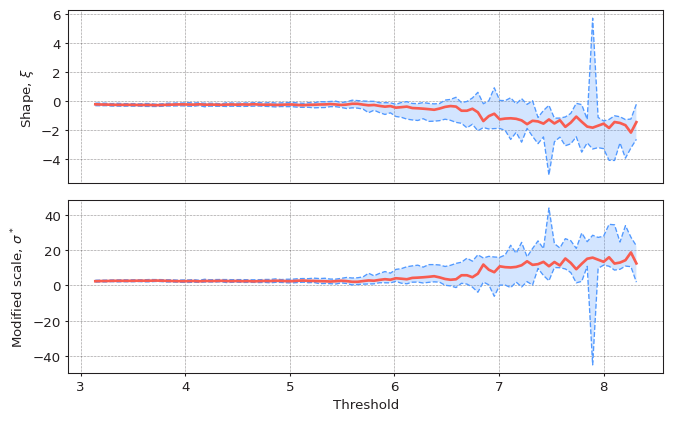

In [6]:
plot_parameter_stability(ts=data.hs,r='72H',alpha=.95);

<AxesSubplot:xlabel='Threshold', ylabel='Mean excess'>

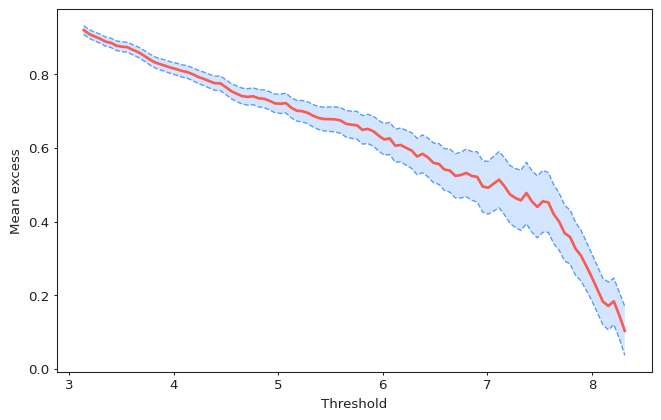

In [7]:
plot_mean_residual_life(data.hs);

In [8]:
quant=0.98
models = get_fitted_models(data[["hs","wspd"]],quantile=quant,r="72H")

In [9]:
models

[                           Univariate Extreme Value Analysis                            
                                       Source Data                                       
 ----------------------------------------------------------------------------------------
 Data label:                            hs      Size:                             192,840
 Start:                       January 1998      End:                        December 2019
                                      Extreme Values                                     
 ----------------------------------------------------------------------------------------
 Count:                                156      Extraction method:                    POT
 Type:                                high      Threshold:                           4.65
                                          Model                                          
 ----------------------------------------------------------------------------------------
 Model:   

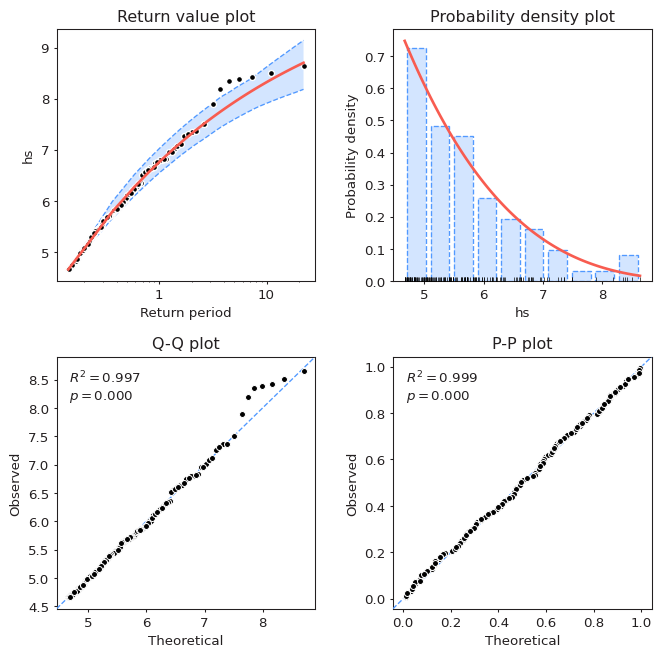

In [10]:
models[0].plot_diagnostic(alpha=0.95);

In [11]:
pd.DataFrame(get_gpd_parameters(models),columns=["mu","sigma","xi"],index=["Hs","Wspd"])

mu     sigma        xi
Hs     4.650000  1.324697 -0.218808
Wspd  14.516887  2.758402 -0.115618

In [12]:
summary_Hs = models[0].get_summary(
    return_period=[1, 2, 5, 10, 25, 50, 100],
    alpha=0.95,
    n_samples=1000,
)
summary_Wspd = models[1].get_summary(
    return_period=[1, 2, 5, 10, 25, 50, 100],
    alpha=0.95,
    n_samples=1000,
)
print(summary_Hs)
print(summary_Wspd)

               return value  lower ci   upper ci
return period                                   
1.0                6.760410  6.494356   7.030210
2.0                7.315393  7.009885   7.600147
5.0                7.931035  7.574924   8.262634
10.0               8.321282  7.901597   8.738626
25.0               8.754182  8.214385   9.355463
50.0               9.028592  8.404933   9.805004
100.0              9.264385  8.554590  10.249569
               return value   lower ci   upper ci
return period                                    
1.0               20.458874  19.676689  21.078920
2.0               21.838636  20.557741  22.686347
5.0               23.500869  21.407007  24.708458
10.0              24.646357  21.849689  26.235007
25.0              26.026355  22.292399  28.189280
50.0              26.977348  22.504724  29.586007
100.0             27.855102  22.684428  30.993797
